In [1]:
import os
os.chdir('/root/awid_dataset/')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

In [2]:
# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
#Fllling the entries "?" with "0"
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
#Fllling the entries "?" with "0"
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.


In [3]:
print(set(df2['class'].unique()) - set(df1['class'].unique()), set(df1['class'].unique()) - set(df2['class'].unique()))

{'authentication_request', 'probe_response'} {'power_saving', 'cts', 'disassociation', 'probe_request', 'rts', 'hirte', 'chop_chop'}


In [4]:
df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

#zero_val_columns = ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.present.fhss', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 'radiotap.channel.type.turbo', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo', 'radiotap.channel.type.half', 'radiotap.channel.type.quarter', 'radiotap.rxflags.badplcp', 'wlan.fc.version', 'wlan.fc.order', 'wlan.ba.control.multitid', 'wlan_mgt.fixed.fragment', 'wlan.qos.eosp', 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated', 'wlan.qos.bit4', 'wlan.qos.txop_dur_req']
#for col in zero_val_columns:
#    df.drop(col, axis=1, inplace=True)

2371216 575642 1795574 2371216


In [5]:
#max([float(i) for i in df1[dataset_columns[37]]])
#[dataset_columns[i] for i in [71, 72, 73, 74, 86, 98, 99, 100, 101, 103, 104]]
#dataset_columns.index(df1.columns[79])
print (len(df['class'].unique()),df['class'].unique(),len(df.columns))
os.chdir('/root/pathint-Fisher/fig_split_mnist/')
print(os.getcwd())

17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response'] 124
/root/pathint-Fisher/fig_split_mnist


In [6]:
obj_df = df.loc[:, (df != 0).any(axis=0)]
obj_df.isnull().values.any()

False

In [7]:
obj_df.head()

,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.rate,...,wlan.wep.key,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.amsdupresent,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated,data.len,class
0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,26,1,1,1,...,0,1,1,0,0,0,0,0,1488,normal
1,1.393668e+09,0.000141,0.000141,0.001197,40,40,26,1,1,1,...,0,0,0,0,0,0,0,0,0,normal
2,1.393668e+09,0.000156,0.000156,0.001353,40,40,26,1,1,1,...,0,0,0,0,0,0,0,0,0,normal
3,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,26,1,1,1,...,0,1,1,0,0,0,0,0,1488,normal
4,1.393668e+09,0.006015,0.006015,0.009210,1552,1552,26,1,1,1,...,0,1,1,0,0,0,0,0,1488,normal


In [8]:
for col in obj_df.columns:
    if col != 'class':
        obj_df[col] = obj_df[col].astype(float)    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
Y_all_attacks = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])


X = obj_df.values[:,:-1]  #It has 17 labels 
print (X.shape)
print("Datasetset Formatting")

for j in range(0,X.shape[1]):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)


(2371216, 98)
Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97


In [10]:
print (X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.33)
print (X_train.shape)

#['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts' 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte' 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

(2371216, 98)
(1588714, 98)


In [11]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['maximum', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of ty


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [12]:
# Data params
input_dim = 98
output_dim = 17

# Network params
n_hidden_units = 20
activation_fn = tf.nn.relu

# Optimization params
batch_size = 1000
epochs_per_task = 5

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [27]:
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,1]]
#task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,2],[5,9],[10,3],[12,6],[14,2]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)

In [28]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
import keras.backend as K
import keras.activations as activations

output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

def masked_softmax(logits):
    # logits are [batch_size, output_dim]
    x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), logits, -1e32 * tf.ones_like(logits))
    return activations.softmax(x)

def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    #print(sess.run(output_mask))
    
def masked_predict(model, data, targets):
    pred = model.predict(data)
    #print(pred)
    acc = np.argmax(pred,1)==np.argmax(targets,1)
    return acc.mean()

/usr/local/lib/python3.5/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [29]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn, input_shape=(input_dim,)))
#model.add(Dense(30, kernel_initializer='random_uniform', activation=activation_fn))
#model.add(Dense(n_hidden_units, activation=activation_fn))
model.add(Dense(output_dim, kernel_initializer='zero', activation=masked_softmax))
#model.add(Dense(output_dim, activation=masked_softmax, input_shape=(input_dim,)))

from pathint import protocols
from pathint.optimizers import KOOptimizer
from keras.optimizers import Adam, RMSprop,SGD
from keras.callbacks import Callback
from pathint.keras_utils import LossHistory
from keras.callbacks import History 
from keras.callbacks import LambdaCallback

#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
#opt = SGD(1e-3)
#opt = RMSprop(lr=1e-3)
oopt = KOOptimizer(opt, model=model, compute_fisher=True, **protocol)
model.compile(loss='categorical_crossentropy', optimizer=oopt, metrics=['accuracy'])
model.model._make_train_function()
saved_weights = model.get_weights()

save_weights_epoch=[]
save_loss_epoch=[]
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_weights_epoch.append(model.get_weights()))
history = LossHistory()
#history = History()
callbacks = [history]
datafile_name = "split_mnist_data_%s.pkl.gz"%protocol_name

In [30]:
print(model.summary())
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1980      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                357       
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
None
(98, 20)
(20,)
(20, 17)
(17,)


In [31]:
print(protocol)

{'task_metrics': {'task_fisher': <function <lambda>.<locals>.<lambda> at 0x7f9e431b38c8>}, 'task_updates': [('omega', <function <lambda>.<locals>.<lambda> at 0x7f9e431b3840>), ('cweights', <function <lambda>.<locals>.<lambda> at 0x7f9e431b39d8>)], 'regularizer_fn': <function quadratic_regularizer at 0x7fa0ba6d52f0>}


In [32]:
def run_fits(cvals, training_data, valid_data, eval_on_train_set=False, nstats=1):
    acc_mean = dict()
    acc_std = dict()
    model_weights_save = []   #Empty list to save the model weights aftertraining each task
    imp_par = dict()  #Empty list to save importance parameter after learning each progressive task
    for cidx, cval_ in enumerate(tqdm(cvals)):
        runs = []
        for runid in range(nstats):
            sess.run(tf.global_variables_initializer())
            # model.set_weights(saved_weights)
            cstuffs = []
            evals = []
            print("setting cval")
            cval = cval_
            oopt.set_strength(cval)
            oopt.init_task_vars()
            print("cval is", sess.run(oopt.lam))
            for age, tidx in enumerate(range(n_tasks)):
                print("Age %i, cval is=%f"%(age,cval))
                print("settint output mask")
                set_active_outputs(task_labels[age])
                stuffs = model.fit(training_data[tidx][0], training_data[tidx][1], batch_size, epochs_per_task, callbacks=[history, print_weights])
                save_loss_epoch.append(stuffs.history['loss'])
                oopt.update_task_metrics(training_data[tidx][0], training_data[tidx][1], batch_size)
                oopt.update_task_vars()
                ftask = []
                model_weights_save.append(model.get_weights()) #Save the model weights aftertraining each task
                for j in range(n_tasks):
                    set_active_outputs(task_labels[j])
                    if eval_on_train_set:
                        f_ = masked_predict(model, training_data[j][0], training_data[j][1])
                    else:
                        f_ = masked_predict(model, valid_data[j][0], valid_data[j][1])
                    ftask.append(np.mean(f_))
                evals.append(ftask)
                cstuffs.append(stuffs)

                # Re-initialize optimizater variables
                if reset_optimizer:
                    oopt.reset_optimizer()

            evals = np.array(evals)
            runs.append(evals)
        
        runs = np.array(runs)
        acc_mean[cval_] = runs.mean(0)
        acc_std[cval_] = runs.std(0)
    return dict(mean=acc_mean, std=acc_std),model_weights_save, cstuffs

In [33]:
# cvals = np.concatenate(([0], np.logspace(-2, 2, 10)))
# cvals = np.concatenate(([0], np.logspace(-1, 2, 2)))
# cvals = np.concatenate(([0], np.logspace(-2, 0, 3)))
#cvals = np.logspace(-3, 3, 7)#[0, 1.0, 2, 5, 10]
cvals = [1.0]
print(cvals)

[1.0]


In [34]:
#%%capture

recompute_data = True

if recompute_data:
    data,model_weights_save,cstuffs = run_fits(cvals, training_datasets, validation_datasets, eval_on_train_set=False, nstats=n_stats)
    utils.save_zipped_pickle(data, datafile_name)

  0%|          | 0/1 [00:00<?, ?it/s]

setting cval
cval is 1.0
Age 0, cval is=1.000000
settint output mask
Epoch 1/5
  10000/1450156 [..............................] - ETA: 67s - loss: 0.6358 - acc: 0.9994

/usr/local/lib/python3.5/dist-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164914). Check your callbacks.
  % delta_t_median)


1450156/1450156 [==============================] - 30s - loss: 0.0126 - acc: 0.9996    
Epoch 2/5
1450156/1450156 [==============================] - 30s - loss: 6.8624e-04 - acc: 0.9996    
Epoch 3/5
1450156/1450156 [==============================] - 30s - loss: 4.5543e-04 - acc: 0.9996    
Epoch 4/5
1450156/1450156 [==============================] - 30s - loss: 3.8454e-04 - acc: 0.9999    
Epoch 5/5
1450156/1450156 [==============================] - 30s - loss: 3.3649e-04 - acc: 1.0000    
Age 1, cval is=1.000000
settint output mask
Epoch 1/5
52726/52726 [==============================] - 0s - loss: 0.1196 - acc: 0.9955     
Epoch 2/5
52726/52726 [==============================] - 0s - loss: 0.0124 - acc: 0.9996     
Epoch 3/5
52726/52726 [==============================] - 0s - loss: 0.0078 - acc: 1.0000     
Epoch 4/5
52726/52726 [==============================] - 0s - loss: 0.0058 - acc: 1.0000     
Epoch 5/5
52726/52726 [==============================] - 0s - loss: 0.0047 - acc: 1.

100%|██████████| 1/1 [06:23<00:00, 383.74s/it]


In [35]:
import h5py
print(model.summary())
model.save_weights('saved_weights.h5') #This file cannot be opend normaly to view the weghts. It can be loaded through load_model() or can be opend via hdf5 viewer

#Shape of the array containg model weights
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

#a_list[0][0][0] = a_list[0][0][0]+0.00001
#print(a_list[0][0][0])
#model.set_weights(a_list)

#from keras.utils.vis_utils import plot_model
#import pydot
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                1980      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                357       
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________
None
(98, 20)
(20,)
(20, 17)
(17,)


In [36]:
data = utils.load_zipped_pickle(datafile_name)
print(cvals)

[1.0]


In [37]:
import matplotlib.colors as colors
cmap = plt.get_cmap('cool') 
cNorm  = colors.Normalize(vmin=-5, vmax=np.log(np.max(list(data['mean'].keys()))))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
print(scalarMap.get_clim())

(-5.0, 0.0)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


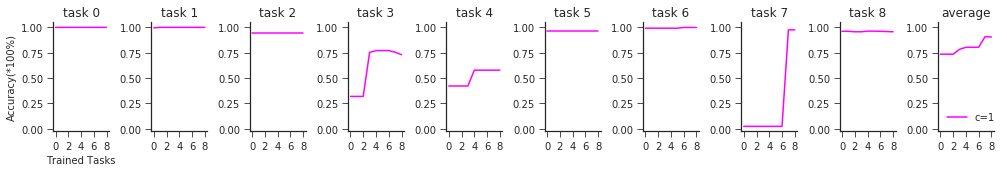

In [38]:
figure(figsize=(14, 2.5))
axs = [subplot(1,n_tasks+1,1)]#, None, None]
for i in range(1, n_tasks + 1):
    axs.append(subplot(1, n_tasks+1, i+1, sharex=axs[0], sharey=axs[0]))
    
keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        colorVal = scalarMap.to_rgba(np.log(cval))
        # axs[j].plot(evals[:, j], c=colorVal)
        axs[j].errorbar(range(n_tasks), mean_vals[:, j], yerr=std_vals[:, j]/np.sqrt(n_stats), c=colorVal)
        axs[j].set_xticks(range(0,n_tasks,2))
        if j==0:
            axs[j].set_xlabel('Trained Tasks')
            axs[j].set_ylabel('Accuracy(*100%)')
    label = "c=%g"%cval
    average = mean_vals.mean(1)  #Taking the average of cross validation accuracies accross all tasks after learning each task
    axs[-1].plot(average, c=colorVal, label=label)
    
for i, ax in enumerate(axs):
    ax.legend(loc='best')
    ax.set_title((['task %d'%j for j in range(n_tasks)] + ['average'])[i])
gcf().tight_layout()
sns.despine()
plt.savefig('Catastrophic-forgetting-AWID.pdf')

In [39]:
#Inspection of behavior of diagonal elements of Fisher matrix 
from numpy import count_nonzero
last_epoch_batchindex = []
counter = 0
for i,j in enumerate(history.batchindex):
    try:
        if history.batchindex[i+1] > j:
            pass
        else:
            counter = counter+1
            if counter%epochs_per_task == 0:
                last_epoch_batchindex.append(i)
    except:
        last_epoch_batchindex.append(i)

print('Batch-id for last epoch of each task:',last_epoch_batchindex)
print('*----------------------------*')
for i,epoch_id in enumerate(last_epoch_batchindex):
    print('Fisher diagonal elements for task {0} is '.format(i), history.fisher_save1[epoch_id].shape, history.fisher_save2[epoch_id].shape, history.fisher_save3[epoch_id].shape, history.fisher_save4[epoch_id].shape)

non_zero_imp_param = []
print('*----------------------------*')
for i,epoch_id in enumerate(last_epoch_batchindex):
    non_zero_imp_param.append(count_nonzero(history.fisher_save1[epoch_id])+ count_nonzero(history.fisher_save2[epoch_id])+ count_nonzero(history.fisher_save3[epoch_id])+ count_nonzero(history.fisher_save4[epoch_id]))
    print('Number of non-zero diagonal elements of Fisher for task {0} is '.format(i),non_zero_imp_param[i])
    

Batch-id for last epoch of each task: [7254, 7519, 7534, 7694, 7714, 7879, 7949, 7964, 7974]
*----------------------------*
Fisher diagonal elements for task 0 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 1 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 2 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 3 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 4 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 5 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 6 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 7 is  (20,) (17,) (98, 20) (20, 17)
Fisher diagonal elements for task 8 is  (20,) (17,) (98, 20) (20, 17)
*----------------------------*
Number of non-zero diagonal elements of Fisher for task 0 is  2019
Number of non-zero diagonal elements of Fisher for task 1 is  2059
Number of non-zero diagonal elements of Fisher for task 2 is  2099
Number of non-

In [40]:
#Inspection of losses after every task 
loss_after_task=[]
print('Batch-id for last epoch of each task:',last_epoch_batchindex)
print('*----------------------------*')
for i,epoch_id in enumerate(last_epoch_batchindex):
    loss_after_task.append(history.losses[epoch_id])
    print('Loss after task {0} '.format(i), history.losses[epoch_id]) 
print('*----------------------------*')

#Inspection of surrogate loss or regularization (sum(big_omega x (theta'-theta))) after every task 
surrogate_loss_after_task=[]
for i,epoch_id in enumerate(last_epoch_batchindex):
    surrogate_loss_after_task.append(history.regs[epoch_id])
    print('Surrogate loss after task {0} '.format(i), history.regs[epoch_id]) 

Batch-id for last epoch of each task: [7254, 7519, 7534, 7694, 7714, 7879, 7949, 7964, 7974]
*----------------------------*
Loss after task 0  1.3747546e-06
Loss after task 1  0.004045195
Loss after task 2  0.28986996
Loss after task 3  0.494961
Loss after task 4  0.60866684
Loss after task 5  0.13665418
Loss after task 6  0.17993098
Loss after task 7  0.08503971
Loss after task 8  0.2442007
*----------------------------*
Surrogate loss after task 0  0.0
Surrogate loss after task 1  1.5397498e-05
Surrogate loss after task 2  22.66621
Surrogate loss after task 3  2.8603114e-05
Surrogate loss after task 4  82.84888
Surrogate loss after task 5  0.0028899305
Surrogate loss after task 6  0.11073192
Surrogate loss after task 7  34.831448
Surrogate loss after task 8  158.7128


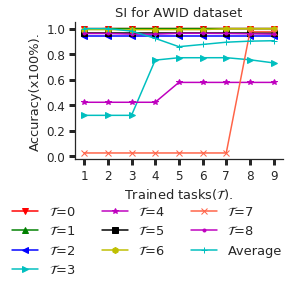

In [42]:
import pdb
figure(figsize=(4, 4.5))
axs = [subplot(1,1,1)]#, None, None]
fontsize = 13

keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

colorVal = ['r','g','b','c','m','k','y','tomato','m','c']
marker=["v","^","<",">","*","s","h","x",".","+"]

mean_stuff=[]
std_stuff=[]
for i in range(len(data['mean'][cval])):
    mean_stuff.append(data['mean'][cval][i][:i+1].mean())
    std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        label = "$\mathcal{T}$=%g"%j
        axs[0].plot(range(1,n_tasks+1), mean_vals[:, j], marker=marker[j], c=colorVal[j], label=label)
    axs[0].plot(range(1,n_tasks+1), mean_stuff, marker=marker[j+1], c=colorVal[j+1], label='Average')
    axs[0].legend(loc='upper right',prop={'size': fontsize}, bbox_to_anchor=(1.05, -0.25), ncol=3)
    axs[0].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
    axs[0].set_ylabel('Accuracy(x100%).',fontsize=fontsize)
    axs[0].set_xticks(range(1,n_tasks+1))
    axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[0].tick_params(labelsize='large', width=3)
    axs[0].set_title('SI for AWID dataset', fontsize=fontsize)
#plt.legend(bbox_to_anchor=(0.78, 0.66),bbox_transform=plt.gcf().transFigure)
gcf().tight_layout()
sns.despine()
plt.savefig('AWID_SIFisher.pdf',bbox_inches = "tight")

In [43]:
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    if i == 0:
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-2])))
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-1])))
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = []
for i in range(len(Flatten_weights)):   
    Extract_model_params.append(Flatten_weights[i])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    if i == 2:
        pass
    else :
        temp=list(np.asarray(Extract_model_params[i])-np.asarray(Extract_model_params[i-1]))
        gradient = [j/0.001 for j in temp]
        gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
Rank_Hessian_matrix = []
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
    Rank_Hessian_matrix.append(rank_Hessian_matrix)
    print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)

Rank of the Hessian Matrix after task= 0 is : 427
Rank of the Hessian Matrix after task= 1 is : 493
Rank of the Hessian Matrix after task= 2 is : 514
Rank of the Hessian Matrix after task= 3 is : 534
Rank of the Hessian Matrix after task= 4 is : 721
Rank of the Hessian Matrix after task= 5 is : 766
Rank of the Hessian Matrix after task= 6 is : 802
Rank of the Hessian Matrix after task= 7 is : 822
Rank of the Hessian Matrix after task= 8 is : 1268


/usr/local/lib/python3.5/dist-packages/matplotlib/tight_layout.py:330: UserWarning: tight_layout not applied: number of rows in subplot specifications mustbe multiples of one another.
  warnings.warn('tight_layout not applied: '


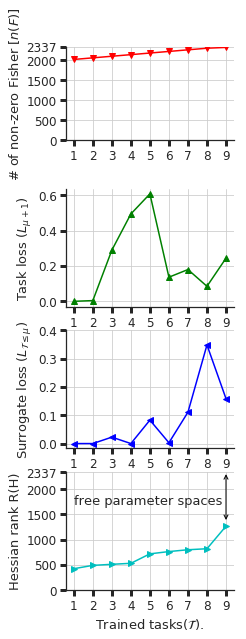

In [62]:
import pdb
figure(figsize=(3, 10))
axs = [subplot(5,1,1)]#, None, None]
for i in range(1, 4):
    axs.append(subplot(4, 1, i+1, sharex=axs[0]))
fontsize = 13

colorVal = ['r','g','b','c','m','k','y']
marker=["v","^","<",">","*","s"]

plots = [non_zero_imp_param,loss_after_task,surrogate_loss_after_task,Rank_Hessian_matrix]
ylabel = ['# of non-zero Fisher $[n(F)]$', 'Task loss ($L_{\mu+1}$)', 'Surrogate loss ($L_{\mathcal{T} \leq \mu}$)','Hessian rank R(H)']
ytick = [[0, 500, 1000, 1500, 2000, 2337], [0,0.2,0.4,0.6], [0, 0.1, 0.2, 0.3, 0.4], [0, 500, 1000, 1500, 2000, 2337]]
title = ['Number of non-zero importance.', 'Loss', 'Surrogate loss', 'Hessian rank']
for i in range(4):
    axs[i].plot(range(1,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
    axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
    axs[i].set_yticks(ytick[i])
    axs[i].tick_params(labelsize='large', width=3)
    axs[i].grid()
axs[-1].set_xticks(range(1,n_tasks+1))
axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
#axs[0].annotate('', (5, 1053), (5, 2337), arrowprops=dict(arrowstyle='<->'))
#axs[0].text(3, 1000 , 'parameter \n spaces \n occupied',fontsize=fontsize)
axs[-1].annotate('', (9, 1350), (9, 2337), arrowprops=dict(arrowstyle='<->'))
axs[-1].text(1, 1700 , 'free parameter spaces',fontsize=fontsize)
plt.tight_layout()
sns.despine()
plt.savefig('AWID_SIFisher_modeleval.pdf',bbox_inches = "tight")

--------------Euclidean distance--------------------
Between task 0 and 1 : 3.4252203876418594
Between task 1 and 2 : 0.49740664456890216
Between task 2 and 3 : 0.8556330075367157
Between task 3 and 4 : 1.089167113656975
Between task 4 and 5 : 2.8031383683027755
Between task 5 and 6 : 1.9073452455888529
Between task 6 and 7 : 0.42719510252809223
Between task 7 and 8 : 0.6143125565285978
--------------Cosine distance--------------------
Between task 0 and 1 : 0.951
Between task 1 and 2 : 0.999
Between task 2 and 3 : 0.997
Between task 3 and 4 : 0.995
Between task 4 and 5 : 0.971
Between task 5 and 6 : 0.987
Between task 6 and 7 : 0.999
Between task 7 and 8 : 0.999
--------------Jaccard similarity--------------------
Between task 0 and 1 : 0.5218202163371877
Between task 1 and 2 : 0.5580524344569289
Between task 2 and 3 : 0.5981907274783265
Between task 3 and 4 : 0.48862853204686424
Between task 4 and 5 : 0.4584023864766324
Between task 5 and 6 : 0.4650098103335513
Between task 6 and 7 :

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


Between task 5 and 6 : 0.6397090286692341
Between task 6 and 7 : 0.7299957210098417
Between task 7 and 8 : 0.47839109970047067


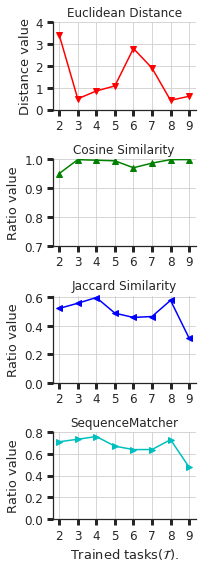

In [53]:
#Heuristic metric: Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

#2. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#3. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

#4. Using SequenceMatcher    
from difflib import SequenceMatcher

Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
print("--------------Euclidean distance--------------------")
Eu_distance = []
for i in range(1,n_tasks):
    eu_dist = euclidean_distance(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
    Eu_distance.append(eu_dist)
    print("Between task {0} and {1} : {2}".format(i-1,i,eu_dist))

print("--------------Cosine distance--------------------")
Cos_distance = []
for i in range(1,n_tasks):
    cos_dist = cosine_similarity(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
    Cos_distance.append(cos_dist)
    print("Between task {0} and {1} : {2}".format(i-1,i,cos_dist))
    
    
print("--------------Jaccard similarity--------------------")
Jac_distance = []
for i in range(1,n_tasks):
    jac_dist = jaccard_similarity(list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i])))
    Jac_distance.append(jac_dist)
    print("Between task {0} and {1} : {2}".format(i-1,i,jac_dist))

print("--------------Sequence Matcher--------------------")
Seq_matcher = []
for i in range(1,n_tasks):
    seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[i-1])),list(flatten(model_weights_save[i]))).ratio()
    Seq_matcher.append(seq_matcher)
    print("Between task {0} and {1} : {2}".format(i-1,i,seq_matcher))
    
import pdb
figure(figsize=(3, 8))
subplots_adjust(hspace=0.25,
                    wspace=0.35)
axs = [plt.subplot(4,1,1)]#, None, None]
for i in range(1, 4):
    axs.append(subplot(4, 1, i+1, sharex=axs[0]))
fontsize = 13

colorVal = ['r','g','b','c','m','k','y']
marker=["v","^","<",">","*","s"]

plots = [Eu_distance,Cos_distance,Jac_distance,Seq_matcher]
ylabel = ['Distance value', 'Ratio value', 'Ratio value','Ratio value']
ytick = [[0, 1, 2, 3, 4], [0.7, 0.8, 0.9, 1],[0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6, 0.8]]
title = ['Euclidean Distance', 'Cosine Similarity', 'Jaccard Similarity', 'SequenceMatcher']
for i in range(4):
    axs[i].plot(range(2,n_tasks+1), plots[i], marker=marker[i], c=colorVal[i])
    axs[i].set_ylabel(ylabel[i],fontsize=fontsize)
    axs[i].set_yticks(ytick[i])
    axs[i].tick_params(labelsize='large', width=3)
    axs[i].grid()
    axs[i].set_title(title[i])
axs[-1].set_xticks(range(2,n_tasks+1))
axs[-1].set_xlabel("Trained tasks($\mathcal{T}$).",fontsize=fontsize)
plt.tight_layout()
sns.despine()
plt.savefig('AWID_SIFisher_Similaritymetric.pdf',bbox_inches = "tight")

In [20]:
#Heuristic metric: Weights Pattern between task 0 and last task 
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

#2. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

#3. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

#4. Using SequenceMatcher    
from difflib import SequenceMatcher


eu_dist = euclidean_distance(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
print("Euclidean distance between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,eu_dist))

cos_dist = cosine_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
print("Cosine angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,cos_dist))

jac_dist = jaccard_similarity(list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1])))
print("Jaccard similarity between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,jac_dist))

seq_matcher = SequenceMatcher(None,list(flatten(model_weights_save[0])),list(flatten(model_weights_save[-1]))).ratio()
print("Sequence angle between task {0} and {1} : {2}".format(0,len(model_weights_save)-1,seq_matcher))

Euclidean distance between task 0 and 5 : 5.549259472071931
Cosine angle between task 0 and 5 : 0.976
Jaccard similarity between task 0 and 5 : 0.2591187627662679
Sequence angle between task 0 and 5 : 0.40136927685066326


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


In [24]:
for j in range(n_tasks):
    print('Rank of data for task-{0} of shape-{1} is: {2}'.format(j,training_datasets[j][0].shape,matrix_rank(np.matrix(training_datasets[j][0], dtype='float'))))
    print('----------------------------------------------------------------------')

Rank of data for task-0 of shape-(1450552, 123) is: 45
----------------------------------------------------------------------
Rank of data for task-1 of shape-(52763, 123) is: 8
----------------------------------------------------------------------
Rank of data for task-2 of shape-(2063, 123) is: 11
----------------------------------------------------------------------
Rank of data for task-3 of shape-(31164, 123) is: 9
----------------------------------------------------------------------
Rank of data for task-4 of shape-(3789, 123) is: 18
----------------------------------------------------------------------
Rank of data for task-5 of shape-(31936, 123) is: 21
----------------------------------------------------------------------
Rank of data for task-6 of shape-(13015, 123) is: 18
----------------------------------------------------------------------
Rank of data for task-7 of shape-(2385, 123) is: 8
----------------------------------------------------------------------
Rank of data

In [25]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


[0.999991600849994, 0.9999316693304703, 0.999974802549982, 0.9840243508045968, 0.9871802904691418, 0.9892550789354635, 0.990838952097133, 0.9885663652091471, 0.9884011124789485]


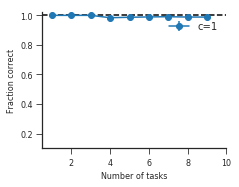

In [26]:
#Fractional Correctness = Average of cross validation accuracies of learned tasks only after training each task 
fig = plt.figure(figsize=(3.3,2.5))
ax = plt.subplot(111)

for cval in sorted_keys:
    mean_stuff = []
    std_stuff = []
    for i in range(len(data['mean'][cval])):
        mean_stuff.append(data['mean'][cval][i][:i+1].mean())
        std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))
    # plot(range(1,n_tasks+1), mean_stuff, 'o-', label="c=%g"%cval)
    errorbar(range(1,n_tasks+1), mean_stuff, yerr=std_stuff, fmt='o-', label="c=%g"%cval)
        
axhline(data['mean'][cval][0][0], linestyle='--', color='k')
xlabel('Number of tasks')
ylabel('Fraction correct')
legend(loc='best')
xlim(0.5, n_tasks+1)
ylim(0.1, 1.02)
# grid('on')
# sns.despine()
print(mean_stuff)
simple_axis(ax)
plt.savefig('2attack_fractional_correct_AWID.pdf')

In [27]:
len(mean_stuff)

9

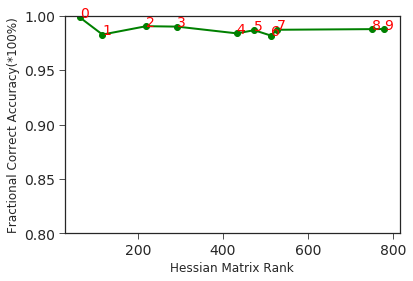

[0.9985, 0.9828, 0.9905, 0.9901, 0.9839, 0.9868, 0.9819, 0.9872, 0.9878, 0.9879]


In [29]:
import matplotlib.pyplot as plt
import matplotlib     
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=14)
n_tasks=10
mean_stuff = [0.9985, 0.9828, 0.9905, 0.9901, 0.9839, 0.9868, 0.9819, 0.9872, 0.9878, 0.9879]
Hess_rank=[64, 117, 220, 293, 433, 474, 513, 528, 752, 780] #calculated previously
plt.plot(Hess_rank,mean_stuff,'go-', linewidth=2)
for i,j,k in zip(Hess_rank,mean_stuff,range(n_tasks)):
    plt.annotate(str(k),xy=(i,j),color='r', fontsize=14)
plt.xlabel('Hessian Matrix Rank',fontsize=12)
plt.ylabel('Fractional Correct Accuracy(*100%)',fontsize=12)
plt.yticks([1, 0.95, 0.90, 0.85, 0.80])
plt.savefig('Fractioncorrect-Hessian-AWID.pdf')
plt.show()
print(mean_stuff)

In [36]:
len(model_weights_save),len(save_weights_epoch),

(9, 90)

In [27]:
model_weights_save = model_weights_save[n_tasks:]
len(model_weights_save)

8

In [28]:
save_weights_epoch = save_weights_epoch[n_tasks*epochs_per_task:]
len(save_weights_epoch)

80

In [37]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for i in range(n_tasks):   
    Extract_model_params.append(Flatten_weights[i])

In [38]:
len(Extract_model_params),n_tasks

(9, 9)

In [176]:
#Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
#2. Manhattan Distance
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
#3.  Minkowski distance 
from decimal import Decimal
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
#4. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
#5. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
#6. Using Heuristic    
import difflib 

for i in [0,1,2,3,4,5,6,7]:
    print("Eucledian Parameter shift after task {0} :".format(i+1),euclidean_distance(Extract_model_params[i],Extract_model_params[i+1]))
#for i in [0,1,2,3]:
#    print("Manhattan Parameter shift after task {0} :".format(i+1),manhattan_distance(Extract_model_params[i],Extract_model_params[i+1]))
#for i in [0,1,2,3]:
#    print("Minkowsk iParameter shift after task {0} :".format(i+1),minkowski_distance(Extract_model_params[i],Extract_model_params[i+1],3))
for i in [0,1,2,3,4,5,6,7]:
    print("Cosine Parameter shift after task {0} :".format(i+1),cosine_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Jaccard Parameter shift after task {0} :".format(i+1),jaccard_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Heuristic Parameter shift after task {0} :".format(i+1),difflib.SequenceMatcher(None,Extract_model_params[i],Extract_model_params[i+1]).ratio())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


Eucledian Parameter shift after task 1 : 2.7824163325561404
Eucledian Parameter shift after task 2 : 3.551588252916112
Eucledian Parameter shift after task 3 : 6.5737174840256545
Eucledian Parameter shift after task 4 : 4.270053869921836
Eucledian Parameter shift after task 5 : 6.019747971734411
Eucledian Parameter shift after task 6 : 0.3157356820758686
Eucledian Parameter shift after task 7 : 4.535606333035204
Eucledian Parameter shift after task 8 : 3.0939059708072034
Cosine Parameter shift after task 1 : 0.974
Cosine Parameter shift after task 2 : 0.959
Cosine Parameter shift after task 3 : 0.881
Cosine Parameter shift after task 4 : 0.956
Cosine Parameter shift after task 5 : 0.926
Cosine Parameter shift after task 6 : 1.0
Cosine Parameter shift after task 7 : 0.964
Cosine Parameter shift after task 8 : 0.984
Jaccard Parameter shift after task 1 : 0.6688818260618319
Jaccard Parameter shift after task 2 : 0.6904347826086956
Jaccard Parameter shift after task 3 : 0.587823275862069
J

In [39]:
#Counting the number of changed parameters
changed_model_parameters=[]
for i in range(1,len(Extract_model_params)):
    temp=[]
    for j,k in zip(Extract_model_params[i],Extract_model_params[i-1]):
        temp.append(abs(i-j))
    changed_model_parameters.append(temp)
print(len(changed_model_parameters))

import csv
#Save the model parameters in text file
with open('temp', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(Extract_model_params)

8


In [40]:
#Number of parameters unchanged within the thresold. Checked for five threshold values as [1e-5, 1e-4, 1e-3, 1e-2, 1e-1].
for i in range(len(changed_model_parameters)):
    print('-----After learning',i+2,'task-----')
    for j in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        print(j,'---->',sum(k < j for k in changed_model_parameters[i]))

-----After learning 2 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 14
-----After learning 3 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 7
-----After learning 4 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 2
-----After learning 5 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 6 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 7 task-----
1e-05 ----> 0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """


0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 8 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 9 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0


In [41]:
import pandas as pd
from numpy.linalg import matrix_rank
import math
corr_matrix = []
corr_row = []
Rank_corr_matrix=[]
for j in range(n_tasks):
    df = pd.DataFrame(training_datasets[j][0])
    correlation_matrix = df.corr().values
    correlation_matrix = np.nan_to_num(correlation_matrix)
    for k in range(len(correlation_matrix)):
        for i in range(len(correlation_matrix)):
            corr_elem = (math.ceil(correlation_matrix[k][i]*1e10)/1e10)
            corr_row.append(np.around(corr_elem))
        corr_matrix.append(corr_row)
        corr_row = []
    rank_corr_matrix=np.linalg.matrix_rank(np.asarray(corr_matrix))
    Rank_corr_matrix.append(rank_corr_matrix)
    print('Rank of the Autocorrelation Matrix for task=',j,'is :',rank_corr_matrix)

Rank of the Autocorrelation Matrix for task= 0 is : 0
Rank of the Autocorrelation Matrix for task= 1 is : 0
Rank of the Autocorrelation Matrix for task= 2 is : 0
Rank of the Autocorrelation Matrix for task= 3 is : 0
Rank of the Autocorrelation Matrix for task= 4 is : 0
Rank of the Autocorrelation Matrix for task= 5 is : 0
Rank of the Autocorrelation Matrix for task= 6 is : 0
Rank of the Autocorrelation Matrix for task= 7 is : 0
Rank of the Autocorrelation Matrix for task= 8 is : 0


In [42]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    if i == 0:
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-2])))
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-1])))
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for i in range(len(Flatten_weights)):   
    Extract_model_params.append(Flatten_weights[i])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    if i == 2:
        pass
    else :
        temp=list(np.asarray(Extract_model_params[i])-np.asarray(Extract_model_params[i-1]))
        gradient = [j/0.001 for j in temp]
        gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
Rank_Hessian_matrix = []
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
    Rank_Hessian_matrix.append(rank_Hessian_matrix)
    print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)

Rank of the Hessian Matrix after task= 0 is : 343
Rank of the Hessian Matrix after task= 1 is : 394
Rank of the Hessian Matrix after task= 2 is : 452
Rank of the Hessian Matrix after task= 3 is : 530
Rank of the Hessian Matrix after task= 4 is : 707
Rank of the Hessian Matrix after task= 5 is : 739
Rank of the Hessian Matrix after task= 6 is : 765
Rank of the Hessian Matrix after task= 7 is : 783
Rank of the Hessian Matrix after task= 8 is : 1094


In [43]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for cval in cvals:
    if cval == 1:
        for i in range(0,n_tasks):   
            Extract_model_params.append(Flatten_weights[n_tasks])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    temp=list(np.asarray(Extract_model_params[i-1])-np.asarray(Extract_model_params[i]))
    
    gradient = [j/0.001 for j in temp]
    gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    print('Rank of the Hessian Matrix for k=',k,'is :',np.linalg.matrix_rank(np.asarray(Hessian_matrix)))

IndexError: list index out of range

In [94]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for cval in cvals:
    if cval == 1:
        for i in range(n_tasks+1):   
            Extract_model_params.append(Flatten_weights[n_tasks+i])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    temp=list(np.asarray(Extract_model_params[i-1])-np.asarray(Extract_model_params[i]))
    
    gradient = [j/0.001 for j in temp]
    gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
Hessian_rank=[]
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    rank_curr_hessian = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
    Hessian_rank.append(rank_curr_hessian)
    print('Rank of the Hessian Matrix for k=',k,'is :',rank_curr_hessian,'. Sum: ',sum(Hessian_rank))
    Hessian_matrix = []

Rank of the Hessian Matrix for k= 0 is : 3041 . Sum:  3041
Rank of the Hessian Matrix for k= 1 is : 544 . Sum:  3585
Rank of the Hessian Matrix for k= 2 is : 420 . Sum:  4005
Rank of the Hessian Matrix for k= 3 is : 596 . Sum:  4601
Rank of the Hessian Matrix for k= 4 is : 409 . Sum:  5010
Rank of the Hessian Matrix for k= 5 is : 332 . Sum:  5342
Rank of the Hessian Matrix for k= 6 is : 420 . Sum:  5762
Rank of the Hessian Matrix for k= 7 is : 764 . Sum:  6526
Rank of the Hessian Matrix for k= 8 is : 416 . Sum:  6942


In [52]:
#Saving the parameters for future use
import pickle
with open("AWID_Parameters.txt", "wb") as fp:   #Pickling
    pickle.dump(model_weights_save, fp)
    
with open("AWID_Parameters.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)